C:\Users\gusta\AppData\Local\Temp\ipykernel_9128\1115646390.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


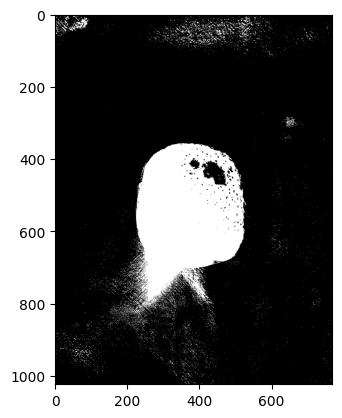

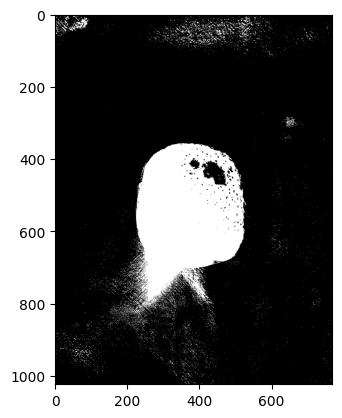

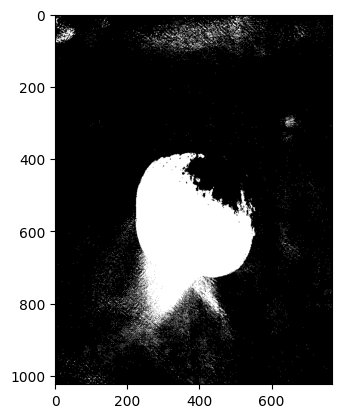

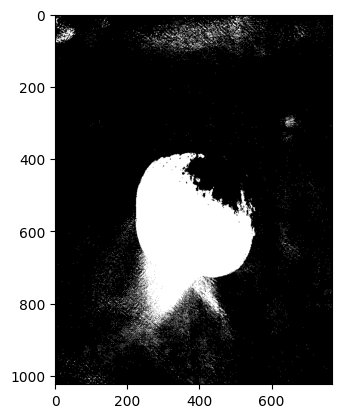

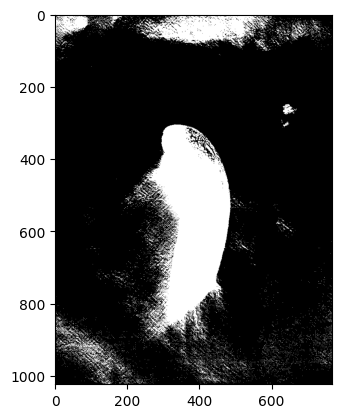

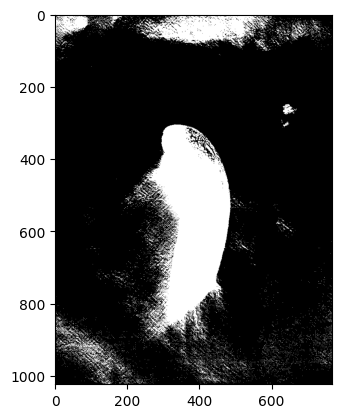

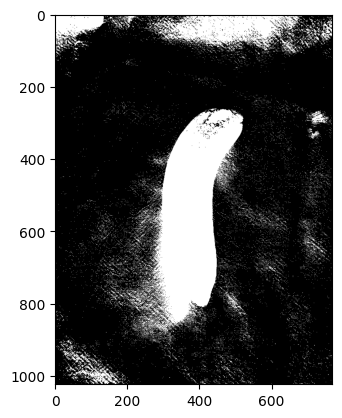

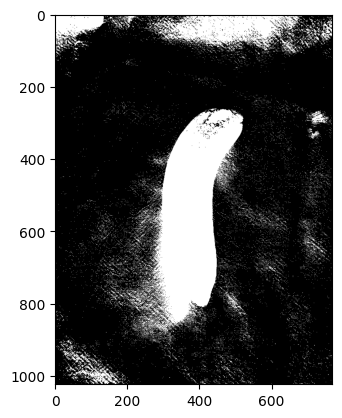

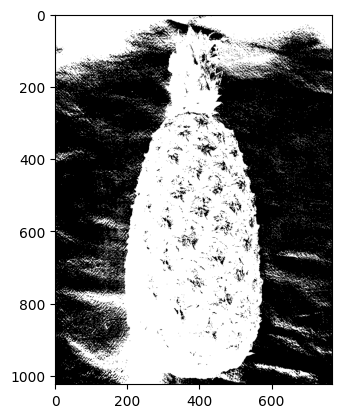

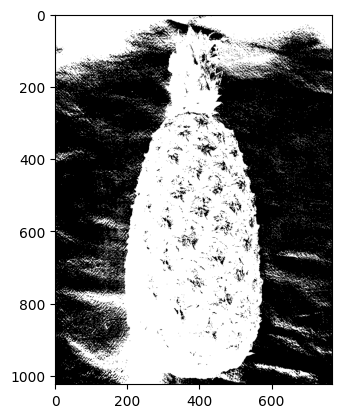

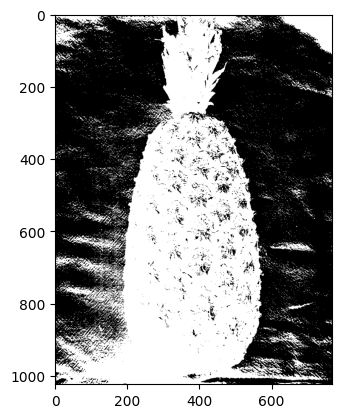

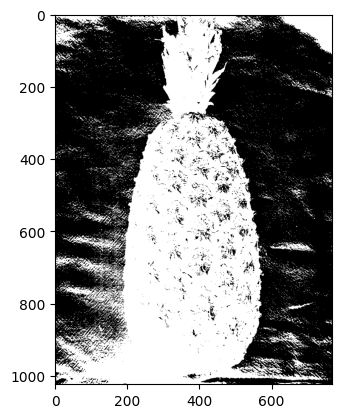

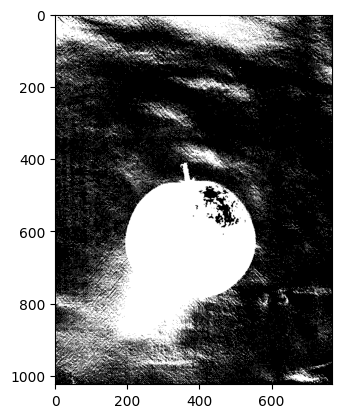

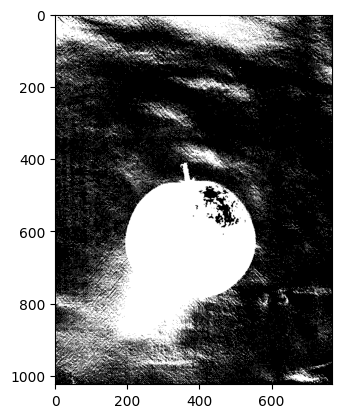

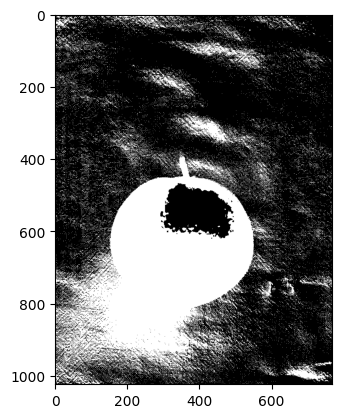

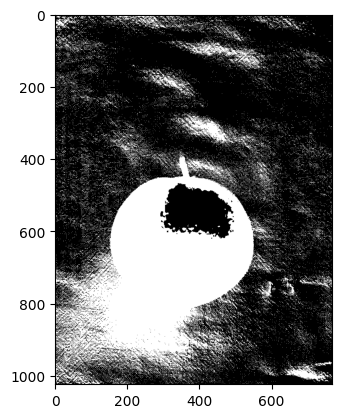

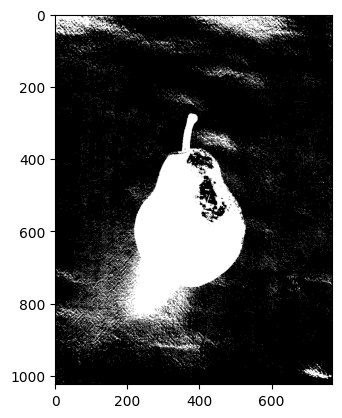

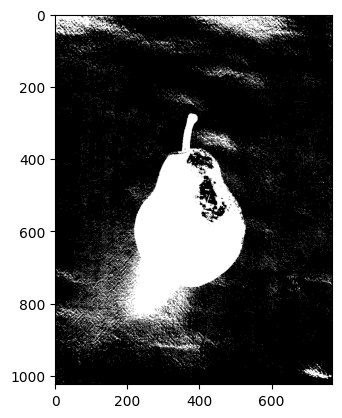

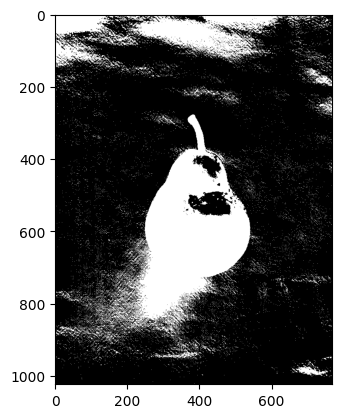

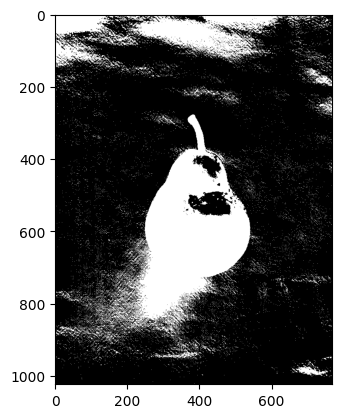

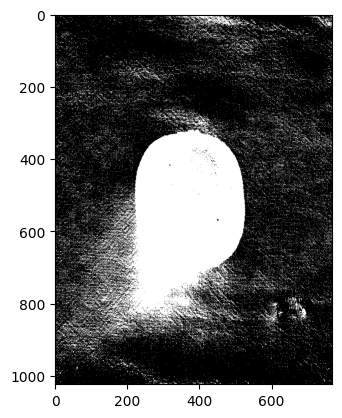

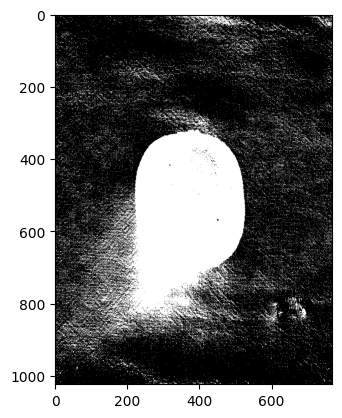

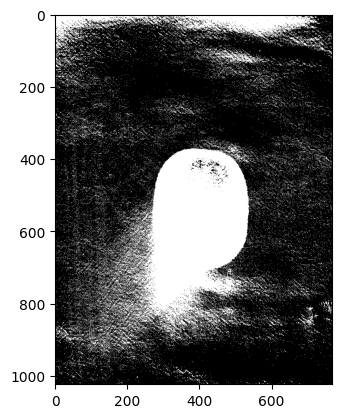

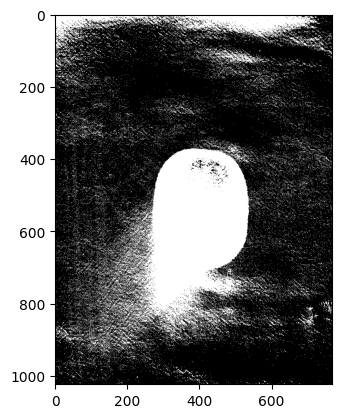

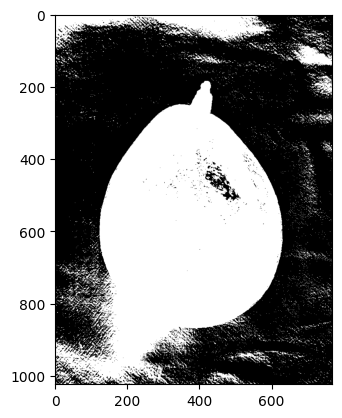

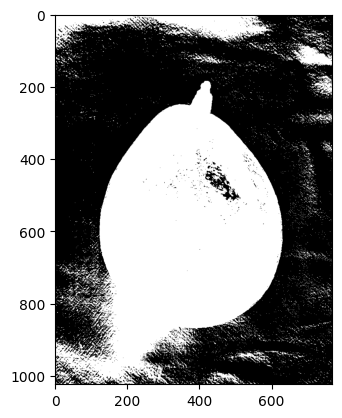

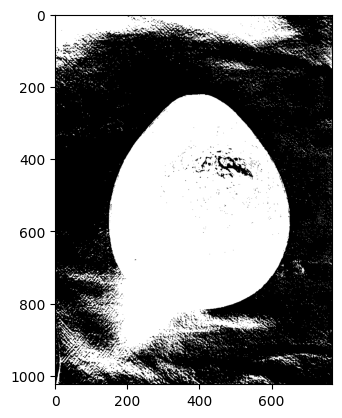

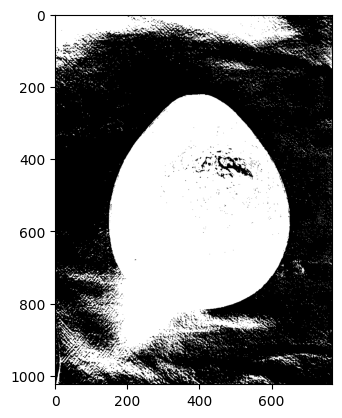

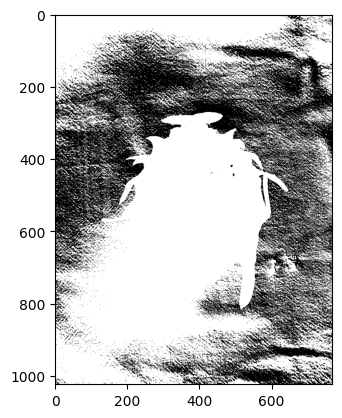

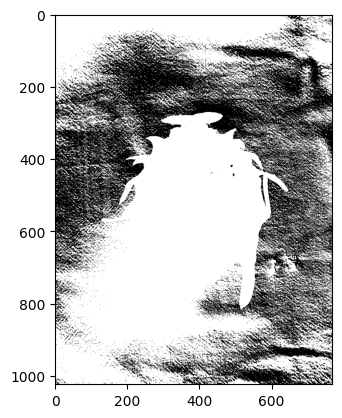

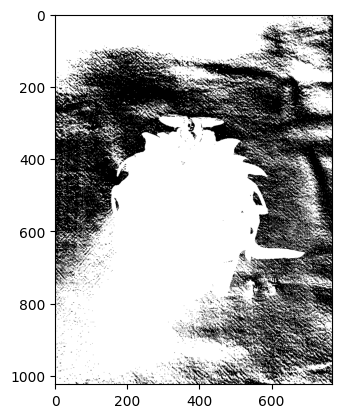

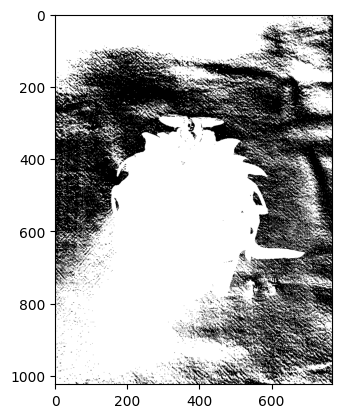

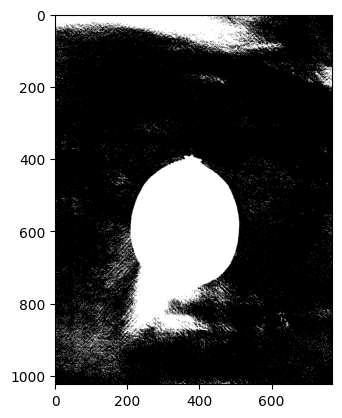

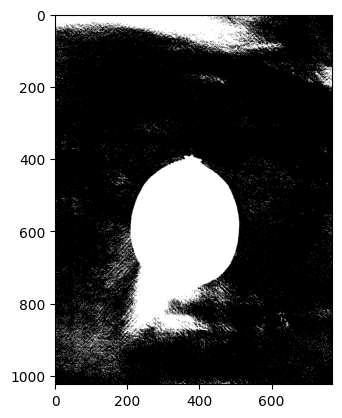

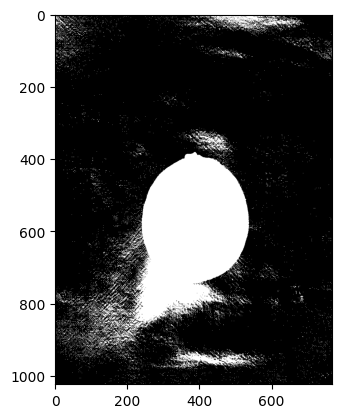

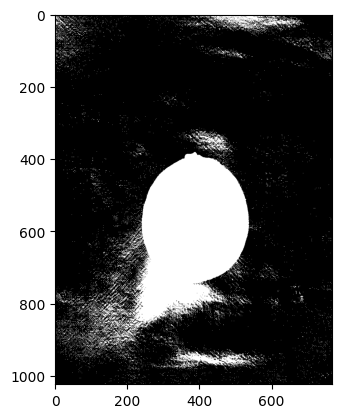

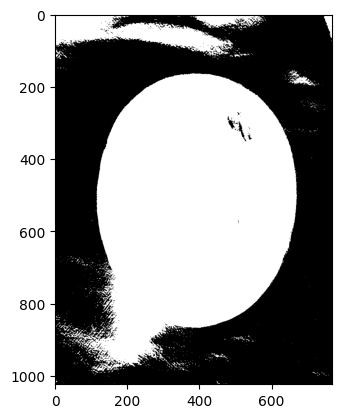

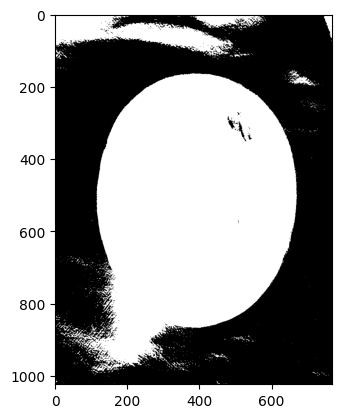

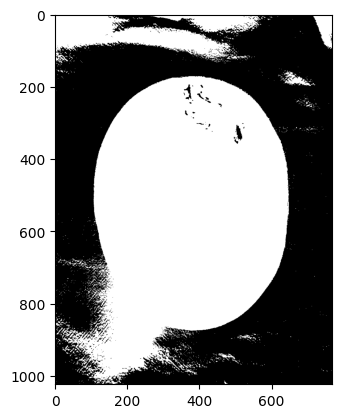

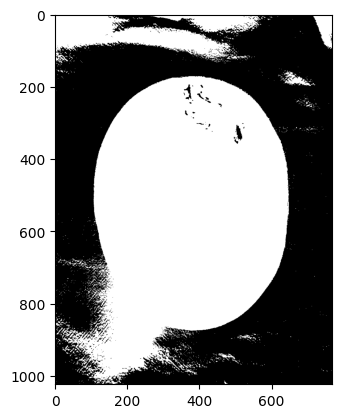

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage import io
import os

def read_image(url):
    return ski.io.imread(url)

def mask_white(image, low, high):
    mask = cv2.inRange(image, low, high)
    result = np.zeros_like(image)
    result[mask != 0] = 255
    return result


def show_image(image):
    fig, ax = plt.subplots()
    plt.imshow(image)

fruits = [('apple', '01'), ('banana', '02'), ('pineapple', '03'), ('orange', '04'), ('pear', '05'), ('kiwi_fruit', '06'), ('avocado', '07'), ('dragon_fruit', '08'), ('lemon', '09'), ('melon', '10')]
versions = ['V1', 'V2']
colors = ['W']
operations = ['', 'mirror']

lows = {
    '01': np.array([0, 0, 0]),
    '02': np.array([0, 0, 0]),
    '03': np.array([0, 0, 0]),
    '04': np.array([0, 0, 0]),
    '05': np.array([0, 0, 0]),
    '06': np.array([0, 0, 0]),
    '07': np.array([0, 0, 0]),
    '08': np.array([0, 0, 0]), 
    '09': np.array([0, 0, 0]),
    '10': np.array([0, 0, 0])
}

highs = {
    '01': np.array([255, 190, 80]),
    '02': np.array([255, 200, 100]),
    '03': np.array([255, 200, 140]),
    '04': np.array([255, 180, 120]),
    '05': np.array([255, 255, 100]),
    '06': np.array([255, 255, 115]),
    '07': np.array([255, 255, 140]),
    '08': np.array([255, 255, 170]), 
    '09': np.array([255, 255, 110]),
    '10': np.array([255, 255, 100])
}

result = []
base_folder = 'FrutasORG'

# Cria a Mascara
for fruit in fruits:
    fruit_folder = os.path.join(base_folder, fruit[0])
    for version in versions:
        for color in colors:
            for operation in operations:
                image_path = os.path.join(fruit_folder, '0-' + fruit[1] + '-' + version + '-' + color + '.png')
                image = read_image(image_path)
                low = lows.get(fruit[1])
                high = highs.get(fruit[1])
                mask_image = mask_white(image, low, high)
                mask_image[mask_image != 0] = 255
                result.append(mask_image)
                path_img = '0-' + fruit[1] + '-' + version + '-' + color + '-' + operation
                cv2.imwrite(path_img + '-mask.png', cv2.cvtColor(mask_image, cv2.COLOR_RGB2BGR))

for image in result:
    show_image(image)
